<a href="https://colab.research.google.com/github/psbruno/fairness/blob/main/Regressao_ParkinsonsTelemonitoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
# Carregar o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
data = pd.read_csv(url)

X = data.drop(columns=['sex', 'motor_UPDRS', 'total_UPDRS'])
y = data['motor_UPDRS']
sex = data['sex']

In [ ]:
data.drop_duplicates('subject#')['sex'].value_counts()

,count
sex,
0,28
1,14


# Modelo padrão

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
data = pd.read_csv(url)

X = data.drop(columns=['sex', 'motor_UPDRS', 'total_UPDRS'])
y = data['motor_UPDRS']
sex = data['sex']

X_train, X_test, y_train, y_test, sex_train, sex_test = train_test_split(X, y, sex, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Converter para tensores do PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Para manter dimensão correta
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
sex_train = torch.tensor(sex_train.values, dtype=torch.long)  # Para classificação
sex_test = torch.tensor(sex_test.values, dtype=torch.long)

# Dataset e DataLoader
class ParkinsonsDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = ParkinsonsDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Definir o modelo de regressão
3

def_MAEs_female = []
def_MAEs_male = []
def_MSEs_female = []
def_MSEs_male = []
def_diff_MAEs = []
def_diff_MSEs = []

for i in range(10):

  model = RegressionNN(input_size=X_train.shape[1])

  # Função de perda de regressão
  regression_loss = nn.MSELoss()

  # Otimizador
  optimizer = optim.Adam(model.parameters(), lr=0.01)

  # Treinamento
  num_epochs = 50
  for epoch in range(num_epochs):
      model.train()
      total_loss = 0
      for X_batch, y_batch in train_loader:
          optimizer.zero_grad()
          reg_output = model(X_batch)
          loss = regression_loss(reg_output, y_batch)
          loss.backward()
          optimizer.step()
          total_loss += loss.item()

      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')

  # Avaliação do modelo de regressão
  model.eval()
  with torch.no_grad():
      outputs = model(X_test)


      # Avaliação da tarefa de regressão
      mask_female = (sex_test == 0)
      mask_male = (sex_test == 1)

      outputs_female = outputs[mask_female]
      y_test_female = y_test[mask_female]
      outputs_male = outputs[mask_male]
      y_test_male = y_test[mask_male]

      mse_female = torch.mean((outputs_female - y_test_female) ** 2).item()
      mae_female = torch.mean(torch.abs(outputs_female - y_test_female)).item()
      mse_male = torch.mean((outputs_male - y_test_male) ** 2).item()
      mae_male = torch.mean(torch.abs(outputs_male - y_test_male)).item()

      print(f'Erro Quadrático Médio (MSE) - Feminino: {mse_female:.4f}')
      print(f'Erro Quadrático Médio (MSE) - Masculino: {mse_male:.4f}')
      print(f'Disparidade Erro Quadrático Médio: {mse_female - mse_male:.4f}')
      print(f'Erro Absoluto Médio (MAE) - Feminino: {mae_female:.4f}')
      print(f'Erro Absoluto Médio (MAE) - Masculino: {mae_male:.4f}')
      print(f'Disparidade Erro Absoluto Médio: {mae_female - mae_male:.4f}')

      def_MSEs_female.append(mse_female)
      def_MSEs_male.append(mse_male)
      def_MAEs_female.append(mae_female)
      def_MAEs_male.append(mae_male)
      def_diff_MAEs.append(mae_female - mae_male)
      def_diff_MSEs.append(mse_female - mse_male)

      print('\n\n\n')

Epoch [1/50], Loss: 97.2405
Epoch [2/50], Loss: 40.7533
Epoch [3/50], Loss: 39.2257
Epoch [4/50], Loss: 36.3428
Epoch [5/50], Loss: 34.1182
Epoch [6/50], Loss: 31.7673
Epoch [7/50], Loss: 29.6725
Epoch [8/50], Loss: 27.3748
Epoch [9/50], Loss: 24.8361
Epoch [10/50], Loss: 23.9049
Epoch [11/50], Loss: 20.7440
Epoch [12/50], Loss: 19.2608
Epoch [13/50], Loss: 18.6424
Epoch [14/50], Loss: 17.8037
Epoch [15/50], Loss: 18.8671
Epoch [16/50], Loss: 17.1386
Epoch [17/50], Loss: 16.3468
Epoch [18/50], Loss: 15.6726
Epoch [19/50], Loss: 14.8531
Epoch [20/50], Loss: 14.0195
Epoch [21/50], Loss: 13.6789
Epoch [22/50], Loss: 13.2319
Epoch [23/50], Loss: 12.2748
Epoch [24/50], Loss: 12.0482
Epoch [25/50], Loss: 11.5123
Epoch [26/50], Loss: 11.4368
Epoch [27/50], Loss: 10.5411
Epoch [28/50], Loss: 10.5977
Epoch [29/50], Loss: 10.9067
Epoch [30/50], Loss: 10.6821
Epoch [31/50], Loss: 9.3272
Epoch [32/50], Loss: 9.7698
Epoch [33/50], Loss: 9.1213
Epoch [34/50], Loss: 10.1994
Epoch [35/50], Loss: 9.398

In [ ]:
import statistics
print('mean MSE Female: ', statistics.mean(def_MSEs_female))
print('mean MSE Male: ', statistics.mean(def_MSEs_male))
print('mean MAE Female: ', statistics.mean(def_MAEs_female))
print('mean MAE Male: ', statistics.mean(def_MAEs_male))
print('mean Diff MSE: ', statistics.mean(def_diff_MSEs))
print('mean Diff MAE: ', statistics.mean(def_diff_MAEs))

mean MSE Female:  9.308277702331543
mean MSE Male:  10.014911460876466
mean MAE Female:  2.2147388815879823
mean MAE Male:  2.2914333939552307
mean Diff MSE:  -0.7066337585449218
mean Diff MAE:  -0.07669451236724853


# Modelo multitask

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Carregar o dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/telemonitoring/parkinsons_updrs.data"
data = pd.read_csv(url)

X = data.drop(columns=['sex', 'motor_UPDRS', 'total_UPDRS'])
y = data['motor_UPDRS']
sex = data['sex']

X_train, X_test, y_train, y_test, sex_train, sex_test = train_test_split(X, y, sex, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Dividir o dataset em treino e teste

# Converter para tensores do PyTorch
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Para manter dimensão correta
y_test = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)
sex_train = torch.tensor(sex_train.values, dtype=torch.long)  # Para classificação
sex_test = torch.tensor(sex_test.values, dtype=torch.long)

# Dataset e DataLoader
class ParkinsonsDataset(Dataset):
    def __init__(self, X, y, sex):
        self.X = X
        self.y = y
        self.sex = sex

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx], self.sex[idx]

train_dataset = ParkinsonsDataset(X_train, y_train, sex_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Definir o modelo multitarefa
class MultiTaskNN(nn.Module):
    def __init__(self, input_size):
        super(MultiTaskNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 64)
        self.fc2 = nn.Linear(64, 32)

        # Cabeça de regressão
        self.fc_reg = nn.Linear(32, 1)

        # Cabeça de classificação
        self.fc_class = nn.Linear(32, 2)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        reg_output = self.fc_reg(x)  # Saída da regressão
        class_output = self.fc_class(x)  # Saída da classificação
        return reg_output, class_output

def combined_loss(reg_output, reg_target, class_output, class_target, alpha):
    reg_loss = regression_loss(reg_output, reg_target)
    class_loss = classification_loss(class_output, class_target)
    return alpha * reg_loss + (1 - alpha) * class_loss
MSEs = {}
MAEs = {}
MSEs_male = {}
MAEs_male = {}
MSEs_female = {}
MAEs_female = {}

for i in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
  MSEs[i] = []
  MAEs[i] = []
  MSEs_male[i] = []
  MAEs_male[i] = []
  MSEs_female[i] = []
  MAEs_female[i] = []

for i in range(10):
  for alpha in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:

    model = MultiTaskNN(input_size=X_train.shape[1])

    # Função de perda combinada
    regression_loss = nn.MSELoss()
    classification_loss = nn.CrossEntropyLoss()

    # Otimizador
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Treinamento
    num_epochs = 50
    for epoch in range(num_epochs):
        model.train()
        total_loss = 0
        for X_batch, y_batch, sex_batch in train_loader:
            optimizer.zero_grad()
            reg_output, class_output = model(X_batch)
            loss = combined_loss(reg_output, y_batch, class_output, sex_batch,alpha)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss / len(train_loader):.4f}')

    # Avaliação do modelo multitarefa
    model.eval()
    with torch.no_grad():
        outputs_regression, outputs_classification = model(X_test)

        # Garantir que outputs_classification tenha a mesma dimensão que sex_test
        outputs_classification = torch.argmax(outputs_classification.squeeze(), dim=1)



        # Avaliação da tarefa de regressão
        mask_female = (sex_test == 0)
        mask_male = (sex_test == 1)

        outputs_female = outputs_regression[mask_female]
        y_test_female = y_test[mask_female]
        outputs_male = outputs_regression[mask_male]
        y_test_male = y_test[mask_male]

        mse_female = torch.mean((outputs_female - y_test_female) ** 2).item()
        mae_female = torch.mean(torch.abs(outputs_female - y_test_female)).item()
        mse_male = torch.mean((outputs_male - y_test_male) ** 2).item()
        mae_male = torch.mean(torch.abs(outputs_male - y_test_male)).item()
        print(f'Alpha: {alpha}')
        print(f'Erro Quadrático Médio (MSE) - Feminino: {mse_female:.4f}')
        print(f'Erro Quadrático Médio (MSE) - Masculino: {mse_male:.4f}')
        print(f'Disparidade Erro Quadrático Médio: {mse_female - mse_male:.4f}')
        print(f'Erro Absoluto Médio (MAE) - Feminino: {mae_female:.4f}')
        print(f'Erro Absoluto Médio (MAE) - Masculino: {mae_male:.4f}')
        print(f'Disparidade Erro Absoluto Médio: {mae_female - mae_male:.4f}')
        MSEs[alpha].append(mse_female - mse_male)
        MAEs[alpha].append(mae_female - mae_male)
        MSEs_female[alpha].append(mse_female)
        MAEs_female[alpha].append(mae_female)
        MSEs_male[alpha].append(mse_male)
        MAEs_male[alpha].append(mae_male)
        # Avaliação da tarefa de classificação
        predicted_sex = (outputs_classification > 0.5).float()
        accuracy = (predicted_sex == sex_test).float().mean().item()

        print(f'Acurácia na previsão de sexo: {accuracy:.4f}')
        print('\n\n\n')

Alpha: 0.1
Erro Quadrático Médio (MSE) - Feminino: 9.7351
Erro Quadrático Médio (MSE) - Masculino: 10.5218
Disparidade Erro Quadrático Médio: -0.7867
Erro Absoluto Médio (MAE) - Feminino: 2.3179
Erro Absoluto Médio (MAE) - Masculino: 2.4865
Disparidade Erro Absoluto Médio: -0.1686
Acurácia na previsão de sexo: 0.9745




Alpha: 0.2
Erro Quadrático Médio (MSE) - Feminino: 7.7406
Erro Quadrático Médio (MSE) - Masculino: 7.6376
Disparidade Erro Quadrático Médio: 0.1030
Erro Absoluto Médio (MAE) - Feminino: 1.9720
Erro Absoluto Médio (MAE) - Masculino: 1.9219
Disparidade Erro Absoluto Médio: 0.0500
Acurácia na previsão de sexo: 0.9694




Alpha: 0.3
Erro Quadrático Médio (MSE) - Feminino: 6.0258
Erro Quadrático Médio (MSE) - Masculino: 6.3435
Disparidade Erro Quadrático Médio: -0.3177
Erro Absoluto Médio (MAE) - Feminino: 1.8245
Erro Absoluto Médio (MAE) - Masculino: 1.9047
Disparidade Erro Absoluto Médio: -0.0802
Acurácia na previsão de sexo: 0.9745




Alpha: 0.4
Erro Quadrático Médio (M

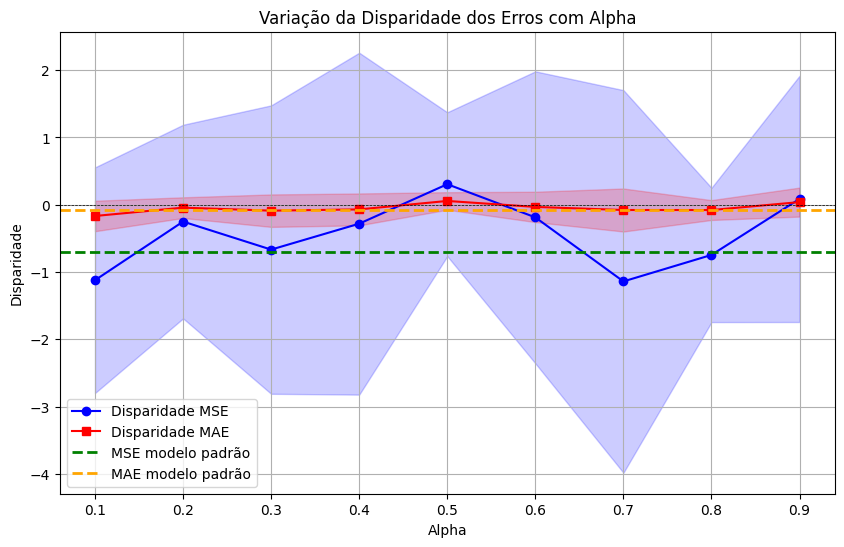

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Dados fornecidos
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mse_disparity = []
mae_disparity = []
mse_std = []
mae_std = []

# Calculando média e desvio padrão para cada alpha
for i in alpha_values:
    mse_disparity.append(statistics.mean(MSEs[i]))
    mae_disparity.append(statistics.mean(MAEs[i]))
    mse_std.append(statistics.stdev(MSEs[i]))
    mae_std.append(statistics.stdev(MAEs[i]))

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando a disparidade do MSE com faixa de desvio padrão
plt.plot(alpha_values, mse_disparity, marker='o', label='Disparidade MSE', color='blue')
plt.fill_between(alpha_values,
                 np.array(mse_disparity) - np.array(mse_std),
                 np.array(mse_disparity) + np.array(mse_std),
                 color='blue', alpha=0.2)

# Plotando a disparidade do MAE com faixa de desvio padrão
plt.plot(alpha_values, mae_disparity, marker='s', label='Disparidade MAE', color='red')
plt.fill_between(alpha_values,
                 np.array(mae_disparity) - np.array(mae_std),
                 np.array(mae_disparity) + np.array(mae_std),
                 color='red', alpha=0.2)

# Adicionando título e labels
plt.title('Variação da Disparidade dos Erros com Alpha')
plt.xlabel('Alpha')
plt.ylabel('Disparidade')

# Adicionando uma linha horizontal em y=0 para referência
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axhline(statistics.mean(def_diff_MSEs), color='green', linestyle='--', linewidth=2, label='MSE modelo padrão')
plt.axhline(statistics.mean(def_diff_MAEs), color='orange', linestyle='--', linewidth=2, label='MAE modelo padrão')

# Adicionando legenda
plt.legend()

# Mostrando o gráfico
plt.grid(True)
plt.show()


In [ ]:
import statistics
print('mean MSE Female: ', statistics.mean(def_MSEs_female))
print('mean MSE Male: ', statistics.mean(def_MSEs_male))
print('mean MAE Female: ', statistics.mean(def_MAEs_female))
print('mean MAE Male: ', statistics.mean(def_MAEs_male))
print('mean Diff MSE: ', statistics.mean(def_diff_MSEs))
print('mean Diff MAE: ', statistics.mean(def_diff_MAEs))

mean MSE Female:  9.308277702331543
mean MSE Male:  10.014911460876466
mean MAE Female:  2.2147388815879823
mean MAE Male:  2.2914333939552307
mean Diff MSE:  -0.7066337585449218
mean Diff MAE:  -0.07669451236724853


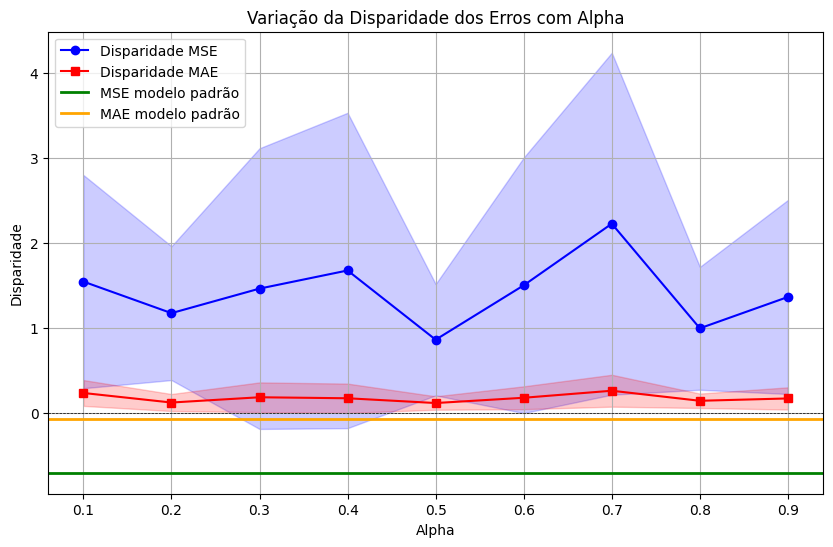

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Dados fornecidos
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mse_disparity = []
mae_disparity = []
mse_std = []
mae_std = []

female_MSEs = {}
female_MSEs = {}

# Calculando média e desvio padrão para cada alpha
for i in alpha_values:
    mse_disparity.append(statistics.mean([abs(x) for x in MSEs[i]]))
    mae_disparity.append(statistics.mean([abs(x) for x in MAEs[i]]))
    mse_std.append(statistics.stdev([abs(x) for x in MSEs[i]]))
    mae_std.append(statistics.stdev([abs(x) for x in MAEs[i]]))
    female_MSEs.append(statistics.mean(MSEs_female))
    female_MSEs.append(statistics.mean(MSEs_female))

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando a disparidade do MSE com faixa de desvio padrão
plt.plot(alpha_values, female_MSEs, marker='o', label='Disparidade MSE', color='blue')
plt.fill_between(alpha_values,
                 np.array(mse_disparity) - np.array(mse_std),
                 np.array(mse_disparity) + np.array(mse_std),
                 color='blue', alpha=0.2)

# Plotando a disparidade do MAE com faixa de desvio padrão
plt.plot(alpha_values, mae_disparity, marker='s', label='Disparidade MAE', color='red')
plt.fill_between(alpha_values,
                 np.array(mae_disparity) - np.array(mae_std),
                 np.array(mae_disparity) + np.array(mae_std),
                 color='red', alpha=0.2)

# Adicionando título e labels
plt.title('Variação da Disparidade dos Erros com Alpha')
plt.xlabel('Alpha')
plt.ylabel('Disparidade')

# Adicionando uma linha horizontal em y=0 para referência
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axhline(statistics.mean(def_diff_MSEs), color='green', linestyle='-', linewidth=2, label='MSE modelo padrão')
plt.axhline(statistics.mean(def_diff_MAEs), color='orange', linestyle='-', linewidth=2, label='MAE modelo padrão')
# Adicionando legenda
plt.legend()

# Mostrando o gráfico
plt.grid(True)
plt.show()


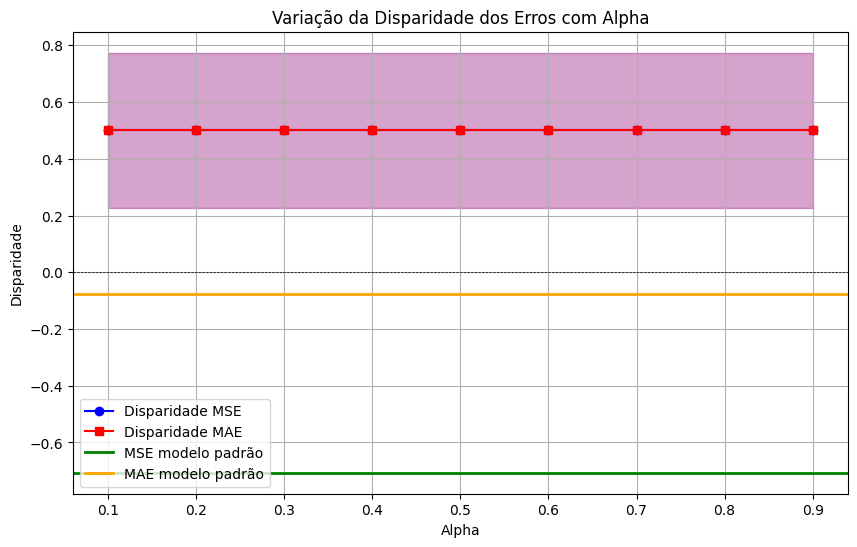

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Dados fornecidos
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mse_disparity = []
mae_disparity = []
mse_std = []
mae_std = []

female_MSEs = []
female_MAEs = []
female_mse_std = []
female_mae_std = []
# Calculando média e desvio padrão para cada alpha
for i in alpha_values:
    female_mse_std.append(statistics.stdev(MSEs_female))
    female_mae_std.append(statistics.stdev(MSEs_female))
    female_MSEs.append(statistics.mean(MSEs_female))
    female_MAEs.append(statistics.mean(MAEs_female))

# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando a disparidade do MSE com faixa de desvio padrão
plt.plot(alpha_values, female_MSEs, marker='o', label='Disparidade MSE', color='blue')
plt.fill_between(alpha_values,
                 np.array(female_MSEs) - np.array(female_mse_std),
                 np.array(female_MSEs) + np.array(female_mse_std),
                 color='blue', alpha=0.2)

# Plotando a disparidade do MAE com faixa de desvio padrão
plt.plot(alpha_values, female_MAEs, marker='s', label='Disparidade MAE', color='red')
plt.fill_between(alpha_values,
                 np.array(female_MAEs) - np.array(female_mae_std),
                 np.array(female_MAEs) + np.array(female_mae_std),
                 color='red', alpha=0.2)

# Adicionando título e labels
plt.title('Variação da Disparidade dos Erros com Alpha')
plt.xlabel('Alpha')
plt.ylabel('Disparidade')

# Adicionando uma linha horizontal em y=0 para referência
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axhline(statistics.mean(def_diff_MSEs), color='green', linestyle='-', linewidth=2, label='MSE modelo padrão')
plt.axhline(statistics.mean(def_diff_MAEs), color='orange', linestyle='-', linewidth=2, label='MAE modelo padrão')
# Adicionando legenda
plt.legend()

# Mostrando o gráfico
plt.grid(True)
plt.show()


In [ ]:
import statistics
print('mean MSE Female: ', statistics.mean(def_MSEs_female))
print('mean MSE Male: ', statistics.mean(def_MSEs_male))
print('mean MAE Female: ', statistics.mean(def_MAEs_female))
print('mean MAE Male: ', statistics.mean(def_MAEs_male))
print('mean Diff MSE: ', statistics.mean(def_diff_MSEs))
print('mean Diff MAE: ', statistics.mean(def_diff_MAEs))

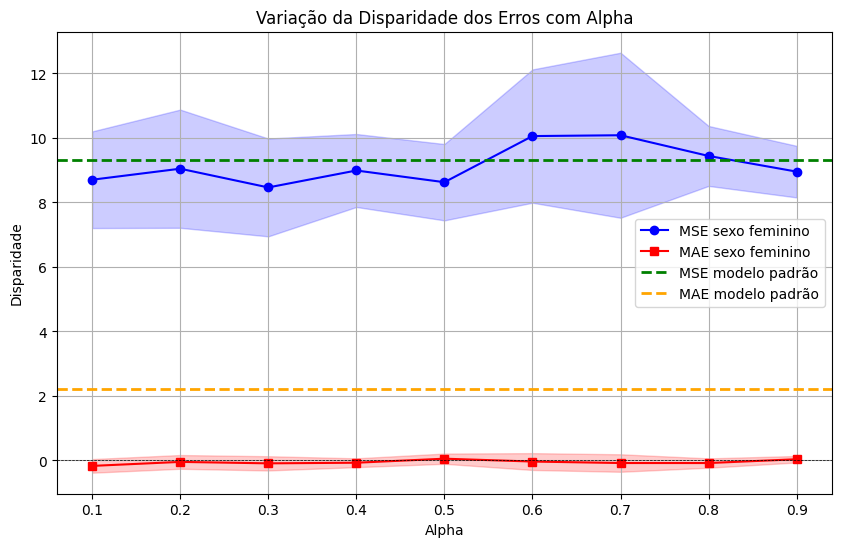

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Dados fornecidos
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mses_female = []
maes_female = []
mses_male = []
maes_male = []
mse_std = []
mae_std = []

dp_mses_female = []
dp_maes_female = []
dp_mses_male = []
dp_maes_male = []

# Calculando média e desvio padrão para cada alpha
for i in alpha_values:
    mses_female.append(statistics.mean(MSEs_female[i]))
    maes_female.append(statistics.mean(MAEs[i]))
    dp_mses_female.append(statistics.stdev(MSEs_female[i]))
    dp_maes_female.append(statistics.stdev(MAEs_female[i]))




# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando a disparidade do MSE com faixa de desvio padrão
plt.plot(alpha_values, mses_female, marker='o', label='MSE sexo feminino', color='blue')
plt.fill_between(alpha_values,
                 np.array(mses_female) - np.array(dp_mses_female),
                 np.array(mses_female) + np.array(dp_mses_female),
                 color='blue', alpha=0.2)

# Plotando a disparidade do MAE com faixa de desvio padrão
plt.plot(alpha_values, maes_female, marker='s', label='MAE sexo feminino', color='red')
plt.fill_between(alpha_values,
                 np.array(maes_female) - np.array(dp_maes_female),
                 np.array(maes_female) + np.array(dp_maes_female),
                 color='red', alpha=0.2)

# Adicionando título e labels
plt.title('Variação da Disparidade dos Erros com Alpha')
plt.xlabel('Alpha')
plt.ylabel('Disparidade')

# Adicionando uma linha horizontal em y=0 para referência
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axhline(statistics.mean(def_MSEs_female), color='green', linestyle='--', linewidth=2, label='MSE modelo padrão')
plt.axhline(statistics.mean(def_MAEs_female), color='orange', linestyle='--', linewidth=2, label='MAE modelo padrão')
# Adicionando legenda
plt.legend()

# Mostrando o gráfico
plt.grid(True)
plt.show()


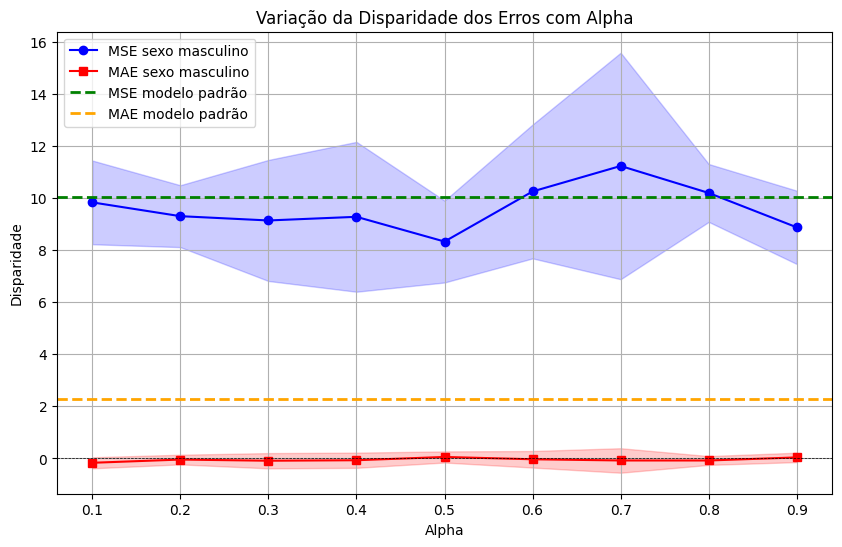

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import statistics

# Dados fornecidos
alpha_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
mses_female = []
maes_female = []
mses_male = []
maes_male = []
mse_std = []
mae_std = []

dp_mses_female = []
dp_maes_female = []
dp_mses_male = []
dp_maes_male = []

# Calculando média e desvio padrão para cada alpha
for i in alpha_values:
    mses_male.append(statistics.mean(MSEs_male[i]))
    maes_male.append(statistics.mean(MAEs[i]))
    dp_mses_male.append(statistics.stdev(MSEs_male[i]))
    dp_maes_male.append(statistics.stdev(MAEs_male[i]))



# Criando o gráfico
plt.figure(figsize=(10, 6))

# Plotando a disparidade do MSE com faixa de desvio padrão
plt.plot(alpha_values, mses_male, marker='o', label='MSE sexo masculino', color='blue')
plt.fill_between(alpha_values,
                 np.array(mses_male) - np.array(dp_mses_male),
                 np.array(mses_male) + np.array(dp_mses_male),
                 color='blue', alpha=0.2)

# Plotando a disparidade do MAE com faixa de desvio padrão
plt.plot(alpha_values, maes_male, marker='s', label='MAE sexo masculino', color='red')
plt.fill_between(alpha_values,
                 np.array(maes_male) - np.array(dp_maes_male),
                 np.array(maes_male) + np.array(dp_maes_male),
                 color='red', alpha=0.2)

# Adicionando título e labels
plt.title('Variação da Disparidade dos Erros com Alpha')
plt.xlabel('Alpha')
plt.ylabel('Disparidade')

# Adicionando uma linha horizontal em y=0 para referência
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.axhline(statistics.mean(def_MSEs_male), color='green', linestyle='--', linewidth=2, label='MSE modelo padrão')
plt.axhline(statistics.mean(def_MAEs_male), color='orange', linestyle='--', linewidth=2, label='MAE modelo padrão')

# Adicionando legenda
plt.legend()

# Mostrando o gráfico
plt.grid(True)
plt.show()


In [ ]:
import statistics
print('mean MSE Female: ', statistics.mean(def_MSEs_female))
print('mean MSE Male: ', statistics.mean(def_MSEs_male))
print('mean MAE Female: ', statistics.mean(def_MAEs_female))
print('mean MAE Male: ', statistics.mean(def_MAEs_male))
print('mean Diff MSE: ', statistics.mean(def_diff_MSEs))
print('mean Diff MAE: ', statistics.mean(def_diff_MAEs))

mean MSE Female:  9.308277702331543
mean MSE Male:  10.014911460876466
mean MAE Female:  2.2147388815879823
mean MAE Male:  2.2914333939552307
mean Diff MSE:  -0.7066337585449218
mean Diff MAE:  -0.07669451236724853
